In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import math
import pandas as pd

Part II

In [113]:
def import_all_txt_files(delimiter=None, skiprows=0, dtype=float):
    """
    Written by Claude.
    Import data from all .txt files in the script's directory
    
    Parameters:
    delimiter (str, optional): Character used to separate values
    skiprows (int, optional): Number of header rows to skip
    dtype (data-type, optional): Data type of the resulting arrays
    
    Returns:
    dict: Dictionary mapping filenames to NumPy arrays
    """

    def find_txt_files(directory=None):
        """
        Find all .txt files in the specified directory
        
        Parameters:
        directory (str, optional): Directory to search in. Default is the script's directory
        
        Returns:
        list: List of paths to .txt files
        """

        if directory is None:
            # Get the directory of the current script
            directory = os.getcwd()
            
        # Find all .txt files in the directory
        txt_files = glob.glob(os.path.join(directory, "*.txt"))
        print(txt_files)
        
        return txt_files

    def import_txt_data(file_path, delimiter=None, skiprows=0, dtype=float):
        """
        Import data from a .txt file to a numpy array
        
        Parameters:
        file_path (str): Path to the .txt file
        delimiter (str, optional): Character used to separate values. Default is None (whitespace)
        skiprows (int, optional): Number of header rows to skip. Default is 0
        dtype (data-type, optional): Data type of the resulting array. Default is float
        
        Returns:
        numpy.ndarray: Array containing the imported data
        """
        try:
            # Load the data from the txt file
            data = np.loadtxt(file_path, delimiter=delimiter, skiprows=skiprows, dtype=dtype)
            print(f"Successfully imported data with shape: {data.shape}")
            return data
        except Exception as e:
            print(f"Error importing data: {e}")
            return None

    txt_files = find_txt_files()
    
    if not txt_files:
        print("No .txt files found in the current directory.")
        return {}
    
    print(f"Found {len(txt_files)} .txt files: {[os.path.basename(f) for f in txt_files]}")
    
    # Dictionary to store data from each file
    data_dict = {}
    
    # Import data from each file
    for file_path in txt_files:
        filename = os.path.basename(file_path)
        data = import_txt_data(file_path, delimiter, skiprows, dtype)
        if data is not None:
            data_dict[filename] = data
    
    return data_dict

def calculate_rms_slope(profile, baselines):
    """
    Written by Claude, tweaked by me.
    Calculate RMS slope at different baseline lengths
    
    Parameters:
    profile: numpy array of elevation values
    baselines: list of baseline lengths to analyze
    
    Returns:
    list of RMS slope values corresponding to each baseline
    """
    rms_slopes = []
    
    for L in baselines:
        # Calculate elevation differences at baseline L
        diffs = np.asarray([np.mean(profile[i*L:(i+1)*L]) for i in range(len(profile)//L)])
        
        # Calculate RMS slope (standard deviation of slopes)
        rms_slope = np.std((diffs[1:] - diffs[:-1]) / L)
        rms_slopes.append(rms_slope)
    
    return np.array(rms_slopes)

['c:\\Users\\miro2306\\Documents\\ASTR5830\\homework4\\ProfileA.txt', 'c:\\Users\\miro2306\\Documents\\ASTR5830\\homework4\\ProfileB.txt']
Found 2 .txt files: ['ProfileA.txt', 'ProfileB.txt']
Successfully imported data with shape: (641, 2)
Successfully imported data with shape: (641, 2)


Text(0.5, 0, 'Distance From Origin (m)')

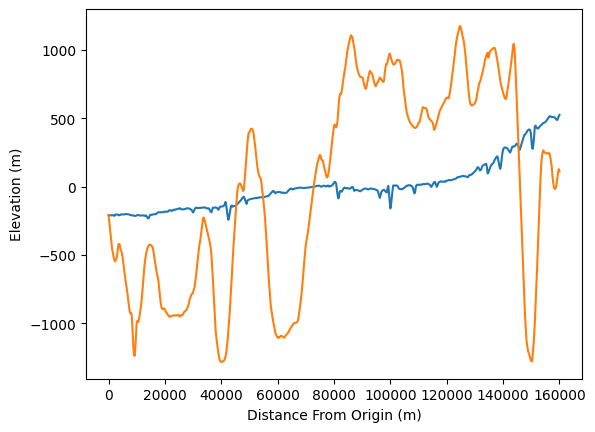

In [114]:
datas = import_all_txt_files()

profileAdata = datas['ProfileA.txt']
profileBdata = datas['ProfileB.txt']

plt.plot(profileAdata[:,0], profileAdata[:,1])
plt.plot(profileBdata[:,0], profileBdata[:,1])
plt.ylabel("Elevation (m)")
plt.xlabel("Distance From Origin (m)")

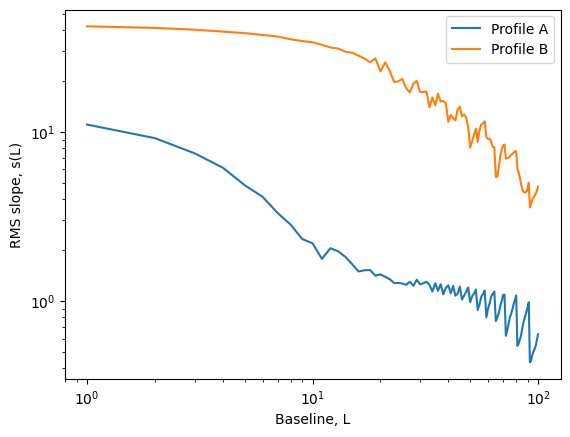

In [116]:
#Generating the baselines, L
baselines = np.linspace(1, 100, 100, dtype=int)

#Generating the RMS slopes from the two profiles
RMS_slopes_A = calculate_rms_slope(profileAdata[:,1], baselines)
RMS_slopes_B = calculate_rms_slope(profileBdata[:,1], baselines)

#Plotting the RMS slopes
plt.plot(baselines, RMS_slopes_A, label='Profile A')
plt.plot(baselines, RMS_slopes_B, label='Profile B')
plt.xlabel("Baseline, L")
plt.ylabel("RMS slope, s(L)")
plt.legend()
plt.yscale('log')
plt.xscale('log')

In [124]:
#Calculating a Hurst exponent for profile A
hurst_A, hurst_B = [], []
s_L, L, s_L0, L0 = RMS_slopes_A[0], baselines[0], RMS_slopes_A[29], baselines[29]
hurst_A = ((math.log(s_L0 / s_L) / math.log(L0 / L)) + 1)
print(f"Profile A Hurst exponent: {hurst_A:.3f}")

#for profile b
s_L, L, s_L0, L0 = RMS_slopes_B[0], baselines[0], RMS_slopes_B[29], baselines[29]
hurst_B = ((math.log(s_L0 / s_L) / math.log(L0 / L)) + 1)
print(f"Profile B Hurst exponent: {hurst_B:.3f}")



Profile A Hurst exponent: 0.360
Profile B Hurst exponent: 0.737


Compared to Rosenburg et al. (2011), the lunar maria have a smaller H. Thus, we conclude that profile A is the lunar maria while profile B is the lunar highlands. Evidence suggests that the lunar highlands are a much older terrain due to the excessive scarring from impactors, as opposed to the maria which are fresher lava deposits which have filled in much of the large impact craters seen in the highlands. The Hurst exponent reflects this, where the smaller Hurst exponent reflects smaller changes in elevation as one traverses the landscape (not as severe cratering in the maria). The larger Hurst exponent in the highlands, however, represents a high likelihood to traverse over large changes in elevation (large impact craters) over the same distances.

**Part III**

In [77]:
import pdr

basepath = os.getcwd()
LBLfile = "MDIS_HIW_256PPD_H10NE2.LBL"
IMGfile = "MDIS_HIW_256PPD_H10NE2.IMG"
LBLdata = pdr.read(os.path.join(basepath, LBLfile))
IMGdata = pdr.read(os.path.join(basepath, IMGfile))

# Try accessing the metadata from the label file instead
if hasattr(LBLdata, 'metadata'):
    metadata = LBLdata.metadata
    # print("Available metadata keys:", list(metadata.keys())[:10])

    print("PRODUCT_ID:", metadata.get('PRODUCT_ID'))
    print("ACQUISITION DATA:", metadata.get('PRODUCT_CREATION_TIME'))
    print("SPATIAL RESOLUTION:", 166.3, "m pixel-1")
    print(f"LOCATION ON MERCURY: \n\tLatitude Range: 0.0 - 22.5 deg \n\tLongitude Range: 108.0 - 144.0 deg")


PRODUCT_ID: MDIS_HIW_256PPD_H10NE2
ACQUISITION DATA: 2016-12-31T07:48:13.404
SPATIAL RESOLUTION: 166.3 m pixel-1
LOCATION ON MERCURY: 
	Latitude Range: 0.0 - 22.5 deg 
	Longitude Range: 108.0 - 144.0 deg


In [78]:
MDISdata = pdr.read('MDIS_HIW_256PPD_H10NE2.xml')
MDISdata['label'].to_dict()

{'Product_Observational': OrderedDict([('Identification_Area',
               OrderedDict([('logical_identifier',
                             'urn:nasa:pds:messenger_mdis_7101:hiw_rdr:mdis_hiw_256ppd_h10ne2'),
                            ('version_id', '1.0'),
                            ('title', 'Messenger HIW derived product'),
                            ('information_model_version', '1.13.0.0'),
                            ('product_class', 'Product_Observational'),
                            ('Alias_List',
                             OrderedDict([('Alias',
                                           [OrderedDict([('alternate_id',
                                                          'MDIS_HIW_256PPD_H10NE2.IMG'),
                                                         ('comment',
                                                          'Original filename at PDS3 archive, on-line at CIS Node')]),
                                            OrderedDict([('alternate_id',
   

['Array_3D_Image', 'label']
(5760, 9216, 1)


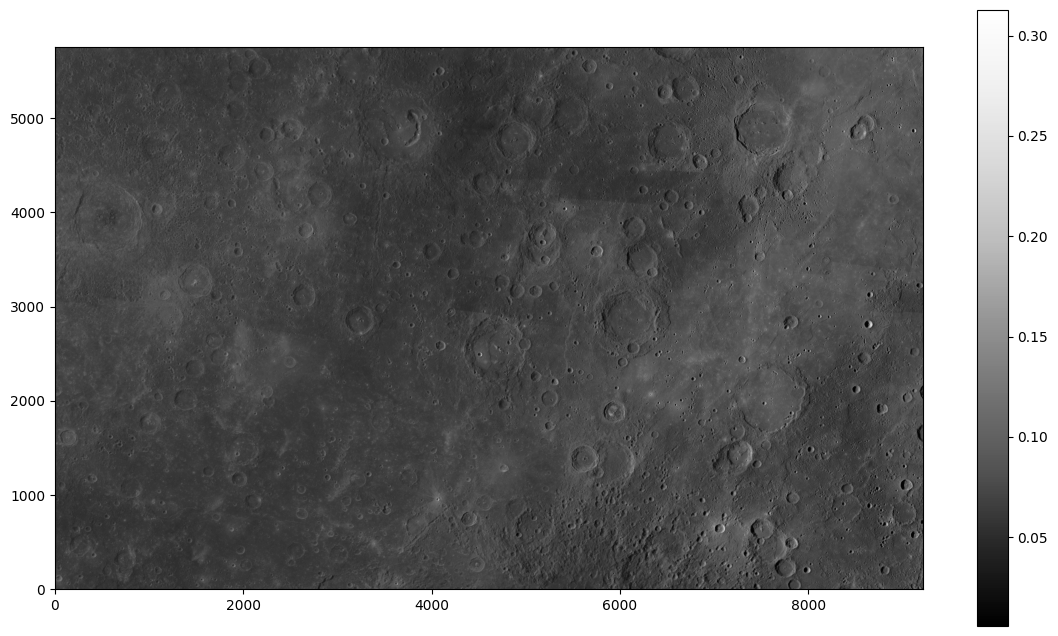

In [73]:
print(MDISdata.keys())
print(MDISdata['Array_3D_Image'].shape)
image = MDISdata['Array_3D_Image']
plt.figure(figsize=(14, 8))
plt.imshow(image, cmap='Greys_r', origin='lower')
plt.colorbar()
plt.show()

*Shadow Measurement and Depth Calculation*

These are 5 large and 5 small craters with clear shadows we'll look at:

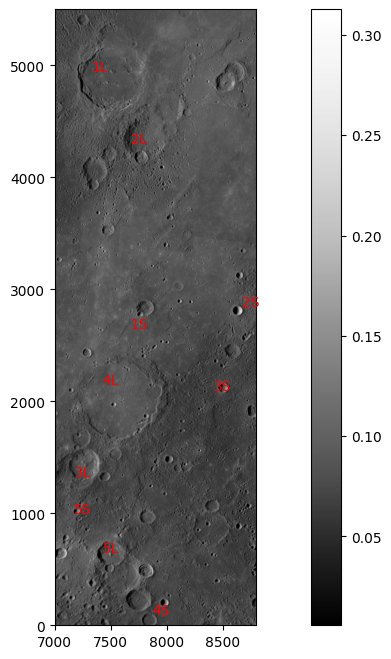

In [50]:
plt.figure(figsize=(14, 8))
plt.imshow(image, cmap='Greys_r', origin='lower')
plt.ylim([0,5500])
plt.xlim([7000, 8800])

plt.text(7400, 4950, '1L', color = 'red', ha = 'center')
plt.text(7750, 4300, '2L', color = 'red', ha = 'center')
plt.text(7250, 1330, '3L', color = 'red', ha = 'center')
plt.text(7500, 2150, '4L', color = 'red', ha = 'center')
plt.text(7500, 650, '5L', color = 'red', ha = 'center')
plt.text(7750, 2650, '1S', color = 'red', ha = 'center')
plt.text(8750, 2850, '2S', color = 'red', ha = 'center')
plt.text(8500, 2100, '3S', color = 'red', ha = 'center')
plt.text(7950, 100, '4S', color = 'red', ha = 'center')
plt.text(7250, 1000, '5S', color = 'red', ha = 'center')

plt.colorbar()
plt.show()

Measuring the crater diameters and shadow lengths:

In [65]:
conversion_factor = 166.3 #m pixel-1

c1L_D, c1L_L = 7800-7205, 7247-7223
c2L_D, c2L_L = 8015-7609, 7677-7609
c3L_D, c3L_L = 7390-7124, 7147-7124
c4L_D, c4L_L = 7920-7216, 7226-7216
c5L_D, c5L_L = 7618-7374, 7412-7374
c1S_D, c1S_L = 7784-7732, np.sqrt(7758**2 + 2771**2) - np.sqrt(7737**2 + 2783**2)
c2S_D, c2S_L = 8670-8583, 8626-8583
c3S_D, c3S_L = 8540-8456, 8489-8456 
c4S_D, c4S_L = 8011-7938, 7975-7938
c5S_D, c5S_L = 7225-7163, 7190-7163

crater_diameters_pixels = [c1L_D, c2L_D, c3L_D, c4L_D, c5L_D, c1S_D, c2S_D, c3S_D, c4S_D, c5S_D]
shadow_lengths_pixels = [c1L_L, c2L_L, c3L_L, c4L_L, c5L_L, c1S_L, c2S_L, c3S_L, c4S_L, c5S_L]

crater_diameters = [D * conversion_factor * 1e-3 for D in crater_diameters_pixels]
shadow_lengths = [L * conversion_factor *1e-3 for L in shadow_lengths_pixels]

print(len(IMGdata), IMGdata.keys())
print(IMGdata["BAND"])

2 ['Array_3D_Image', 'label']


AttributeError: 'Data' object has no attribute 'BAND'

**Part IV**

In [129]:
def load_excel_files(search_pattern='*.xlsx', sheet_name=0):
    """
    Search the current working directory for Excel files and load them into pandas DataFrames.
    
    Parameters:
    -----------
    search_pattern : str, default='*.xlsx'
        The pattern to search for. Default is all .xlsx files. Use '*.xls' for older Excel files
        or a specific pattern like 'data*.xlsx' to find files starting with 'data'.
    sheet_name : str, int, list, or None, default=0
        Sheets to read. If int, will read the sheet at this index.
        If str, will read the sheet with this name.
        If list, will read all sheets specified in the list.
        If None, will read all sheets.
    
    Returns:
    --------
    dict
        A dictionary where keys are filenames and values are either DataFrames or
        dictionaries of DataFrames (if multiple sheets are requested).
    """
    # Get the current working directory
    cwd = os.getcwd()
    
    # Search for Excel files matching the pattern
    file_paths = glob.glob(os.path.join(cwd, search_pattern))
    
    if not file_paths:
        print(f"No {search_pattern} files found in {cwd}")
        return {}
    
    print(f"Found {len(file_paths)} Excel files:")
    for path in file_paths:
        print(f"- {os.path.basename(path)}")
    
    # Dictionary to store data from each file
    data_dict = {}
    
    # Load each Excel file
    for file_path in file_paths:
        filename = os.path.basename(file_path)
        try:
            # Read the Excel file
            excel_data = pd.read_excel(file_path, sheet_name=sheet_name)
            data_dict[filename] = excel_data
            
            # Print information about what was loaded
            if isinstance(excel_data, pd.DataFrame):
                print(f"Loaded {filename}: {excel_data.shape[0]} rows × {excel_data.shape[1]} columns")
            else:  # Dictionary of DataFrames (multiple sheets)
                sheets_info = [f"{sheet}: {df.shape[0]} rows × {df.shape[1]} columns" 
                              for sheet, df in excel_data.items()]
                print(f"Loaded {filename} with sheets: {', '.join(sheets_info)}")
                
        except Exception as e:
            print(f"Error loading {filename}: {e}")
    
    return data_dict

In [132]:
data = load_excel_files()

Found 1 Excel files:
- CH4_amorphous_and_crystalline.xlsx
Loaded CH4_amorphous_and_crystalline.xlsx: 46001 rows × 5 columns


The absorption bands occur around these wavelengths: [3321.707357581797, 7702.380035430949]


Text(0, 0.5, 'Refractive Indices Components')

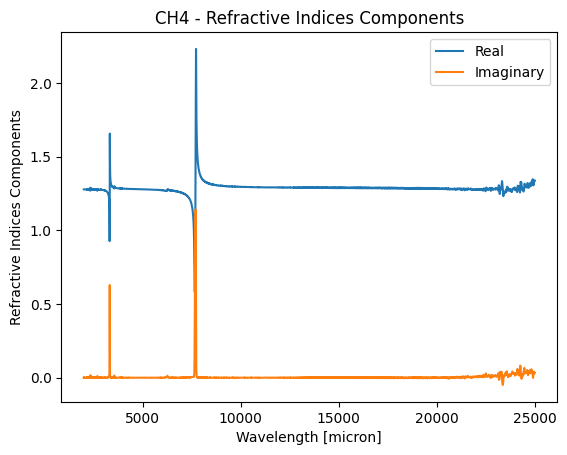

In [181]:
# print(data['CH4_amorphous_and_crystalline.xlsx'])
# print(data['CH4_amorphous_and_crystalline.xlsx'].keys())
#Grabbing k, n from the data
wavenumbers = data['CH4_amorphous_and_crystalline.xlsx']['Wavenumber / cm-1 ']
wavelengths = (1/wavenumbers) * 1e7 #nm
n = data['CH4_amorphous_and_crystalline.xlsx']['n']
k = data['CH4_amorphous_and_crystalline.xlsx']['k']

peaks = [wavelength for i, wavelength in enumerate(wavelengths) if k[i] > 0.5 and k[i-1] < k[i] > k[i+1]]
print(f"The absorption bands occur around these wavelengths: {peaks}")

#plotting components
plt.plot(wavelengths, n, label='Real')
plt.plot(wavelengths, k, label='Imaginary')
plt.title("CH4 - Refractive Indices Components")
plt.legend()
# plt.xscale('log')
plt.xlabel("Wavelength [micron]")
plt.ylabel("Refractive Indices Components")



There are absorption bands at ~3320nm and 7700nm. They are both vibrational modes.

In [182]:
# import miepython
from PyMieScatt import Mie
from matplotlib.gridspec import GridSpec

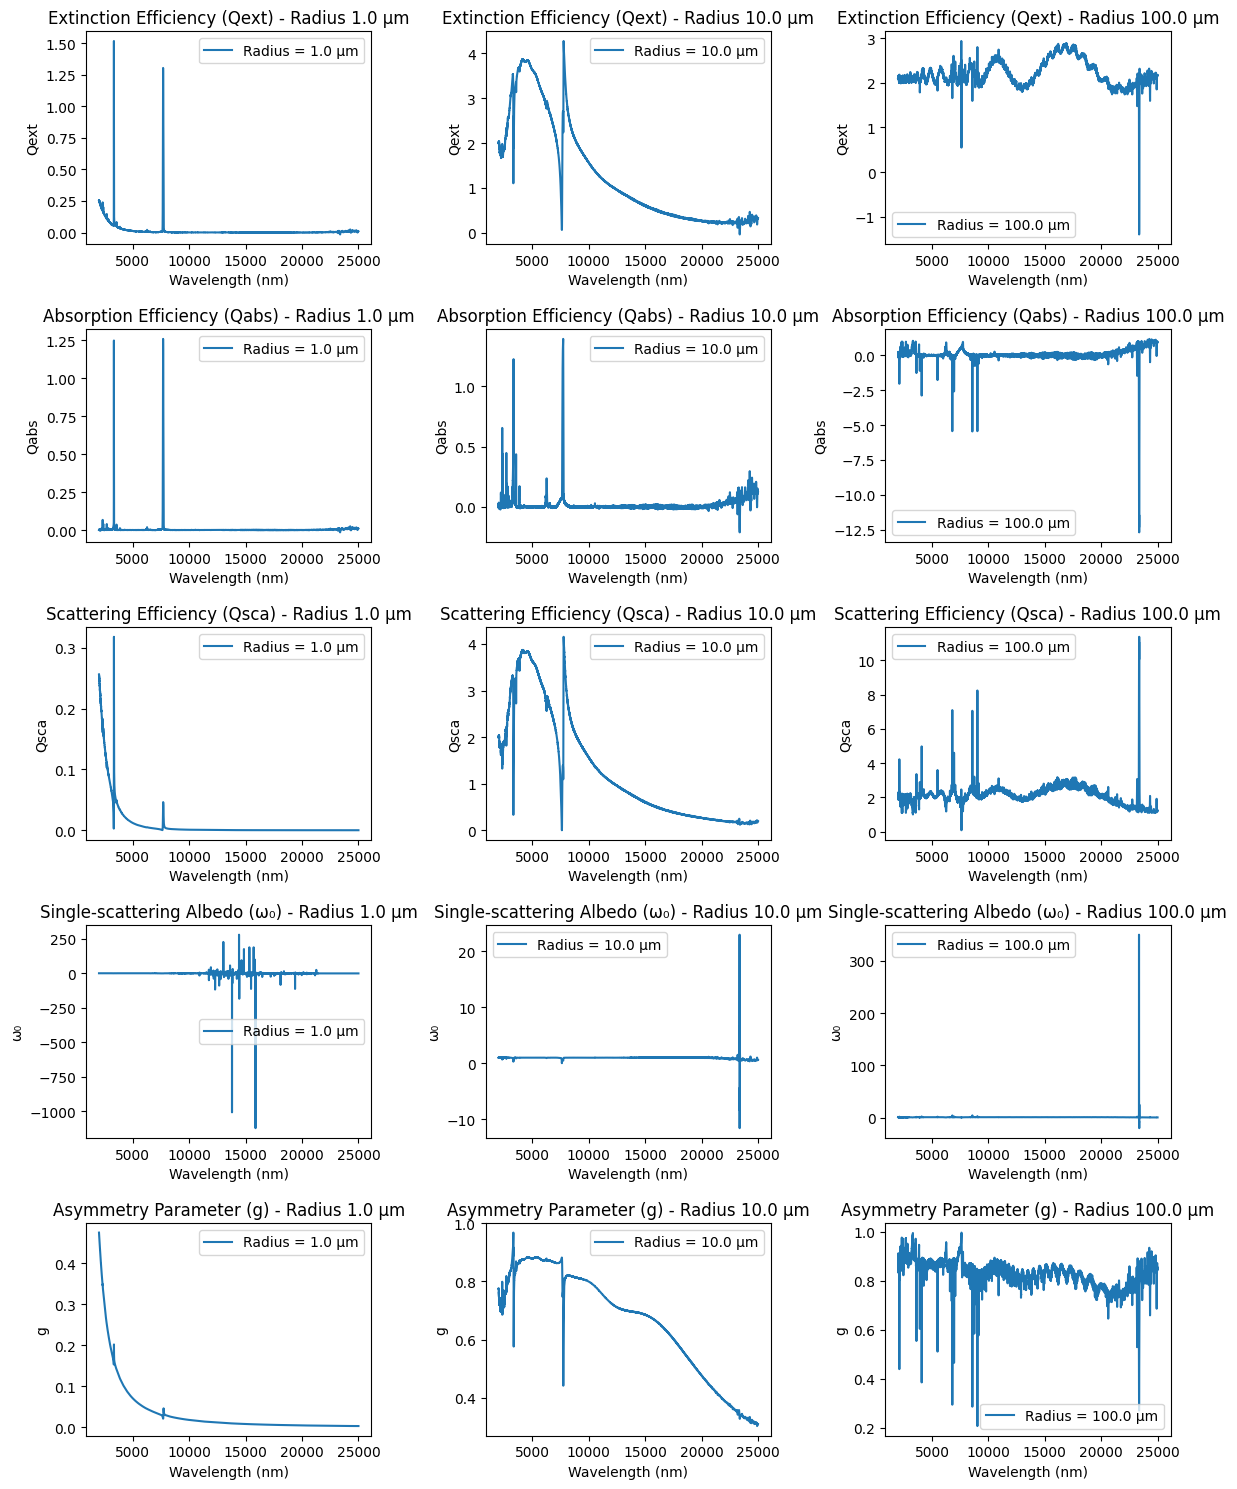

In [195]:
#Written by Claude

# Initialize radii (in meters)
radii = [1e-6, 10e-6, 100e-6]  # 1 µm, 10 µm, 100 µm

# Initialize arrays to store results (2D arrays for each parameter)
Qext = np.zeros((len(radii), len(wavelengths)))
Qabs = np.zeros((len(radii), len(wavelengths)))
Qsca = np.zeros((len(radii), len(wavelengths)))
omega0 = np.zeros((len(radii), len(wavelengths)))
g = np.zeros((len(radii), len(wavelengths)))

# Loop over the different radii and wavelengths
for i, radius in enumerate(radii):
    for j, wavelength in enumerate(wavelengths):
        # Get the refractive index for the current wavelength (complex value: n + ik)
        m = complex(n[j], k[j])

        # Compute Mie scattering parameters using miepython
        qext, qsca, qabs, gg, qpr, qback, qratio = Mie.MieQ(m, wavelength * 1e-9, radius)

        # Store the results
        Qext[i, j] = qext
        Qabs[i, j] = qabs
        Qsca[i, j] = qsca
        omega0[i, j] = qsca / qext  # Single-scattering albedo
        g[i, j] = gg

# Create subplots with 5 rows and 3 columns (each column for one radius)
fig, axs = plt.subplots(5, 3, figsize=(12, 15))  # 5 rows, 3 columns, adjust the figsize as needed

# Loop over each radius and plot each parameter in the respective subplot
for i, radius in enumerate(radii):
    # Qext plot for each radius in its respective column
    axs[0, i].plot(wavelengths, Qext[i, :], label=f'Radius = {radius*1e6} µm')
    axs[0, i].set_xlabel('Wavelength (nm)')
    axs[0, i].set_ylabel('Qext')
    axs[0, i].set_title(f'Extinction Efficiency (Qext) - Radius {radius*1e6} µm')
    axs[0, i].legend()  # Add legend

    # Qabs plot for each radius in its respective column
    axs[1, i].plot(wavelengths, Qabs[i, :], label=f'Radius = {radius*1e6} µm')
    axs[1, i].set_xlabel('Wavelength (nm)')
    axs[1, i].set_ylabel('Qabs')
    axs[1, i].set_title(f'Absorption Efficiency (Qabs) - Radius {radius*1e6} µm')
    axs[1, i].legend()  # Add legend

    # Qsca plot for each radius in its respective column
    axs[2, i].plot(wavelengths, Qsca[i, :], label=f'Radius = {radius*1e6} µm')
    axs[2, i].set_xlabel('Wavelength (nm)')
    axs[2, i].set_ylabel('Qsca')
    axs[2, i].set_title(f'Scattering Efficiency (Qsca) - Radius {radius*1e6} µm')
    axs[2, i].legend()  # Add legend

    # Omega0 plot (Single-scattering albedo) for each radius in its respective column
    axs[3, i].plot(wavelengths, omega0[i, :], label=f'Radius = {radius*1e6} µm')
    axs[3, i].set_xlabel('Wavelength (nm)')
    axs[3, i].set_ylabel('ω₀')
    axs[3, i].set_title(f'Single-scattering Albedo (ω₀) - Radius {radius*1e6} µm')
    axs[3, i].legend()  # Add legend

    # g plot (Asymmetry parameter) for each radius in its respective column
    axs[4, i].plot(wavelengths, g[i, :], label=f'Radius = {radius*1e6} µm')
    axs[4, i].set_xlabel('Wavelength (nm)')
    axs[4, i].set_ylabel('g')
    axs[4, i].set_title(f'Asymmetry Parameter (g) - Radius {radius*1e6} µm')
    axs[4, i].legend()  # Add legend

# Adjust the layout to prevent overlap
plt.tight_layout()

# Optional: Adjust spacing between subplots if necessary
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Show the plot
plt.show()

**Qext - Extinction Efficiency**

This value is the fraction of light that is lost to either absorption or scattering away from the incident light. For small particle size, there are certain wavelength bands where the extinction efficiency is high. Mostly though, there is a very low Qext. As the particle size increases, more wavelengths have a higher extinction efficiency until, at large particle sizes, all wavelengths have a high Qext. 

**Qabs - Absorption Efficiency**

This value describes the fraction of incident light that is absorbed by the particles. A high value corresponds to the particles absorbing a significant fraction of the light, and a low value means that the particle does not absorb a large fraction of incident light. In low value conditions, scattering may be more efficient. As particle size increases, we see from the plots that the absorption bands are broadened in their absorption efficiency, and areas outside of the bands absorb a marginally higher fraction of light.

**Qsca - Scattering Efficiency**

This value described the fraction of incident light that is scattered by the particles. The higher a value, the more likely the particle is to scatter light than to absorb it. Increasing particle size, as seen in the above plots, result in signficantly more efficient scattering by the particle at all wavelengths.

**Omega_0 - Single Scattering Albedo**

This value describes the fraction of total extinction from scattering, as opposed to absorption. High values for the SSA mean that the particle mostly scatters light and absorbs little, while low values mean that the particle mostly absorbs light and does not scatter a large fraction. As particle size increases, these plots seem to show that the particle is perhaps interacting with larger wavelengths of light more efficiently? Although, it seems odd that there does not appear to be a strong correlation with the absorption bands like the scattering efficiency parameter does.

**g - Assymetry Parameter**

This value describes the direction light is most likely to be scattered. It is defined from 1 to -1, where a value close to 1 describes heavily forward scattering by the particle, and values close to -1 describe preference towards backscattering. When g=0, the scattering is isotropic. As the particle size increases, larger and larger wavelengths become mostly forward scattered instead of near isotropic scattering. For all particle sizes, the absorption bands are significantly more likely to scatter isotropically than the surrounding wavelengths. For large particle sizes, the plot shows most wavelengths forward scatter.

*Reflectance Spectra*

In [197]:
#Generating synthetic spectra for the three diff particles sizes of CH4

from planetary import planetRad

#we'll use Titan as our test subject here since it has CH4 in its atmosphere
geometric_A = 0.22 #wikipedia

#mu in function defined as the cos(emission angle) so
theta_e = np.linspace(0, np.pi/2, 50)
mu = np.cos(theta_e)

#also need a tau, we'll use a large scalar value
tau = 1e6

albedo = []
for some_mu in mu:
    some_albedo = []
    for i, radius in enumerate(radii):
        some_albedo.append(planetRad.albedo_layer_twostream(tau=tau, w0=omega0[i], g=g[i], mu=some_mu, asurf=geometric_A))

    albedo.append(some_albedo)
    

c:\Users\miro2306\AppData\Local\Programs\Python\Python310\lib\site-packages\planetary\planetRad.py:186: RuntimeWarning: invalid value encountered in sqrt
  x = np.sqrt(3*ap*(1-w0p))
c:\Users\miro2306\AppData\Local\Programs\Python\Python310\lib\site-packages\planetary\planetRad.py:199: RuntimeWarning: invalid value encountered in scalar multiply
  albedo = (1/q) * ( 2*( p*(1-gamma + w0p*bp) + w0p*(1+bp)*(gamma*x*mu - p)/(1 - (x*mu)**2))  \
c:\Users\miro2306\AppData\Local\Programs\Python\Python310\lib\site-packages\planetary\planetRad.py:199: RuntimeWarning: invalid value encountered in scalar add
  albedo = (1/q) * ( 2*( p*(1-gamma + w0p*bp) + w0p*(1+bp)*(gamma*x*mu - p)/(1 - (x*mu)**2))  \


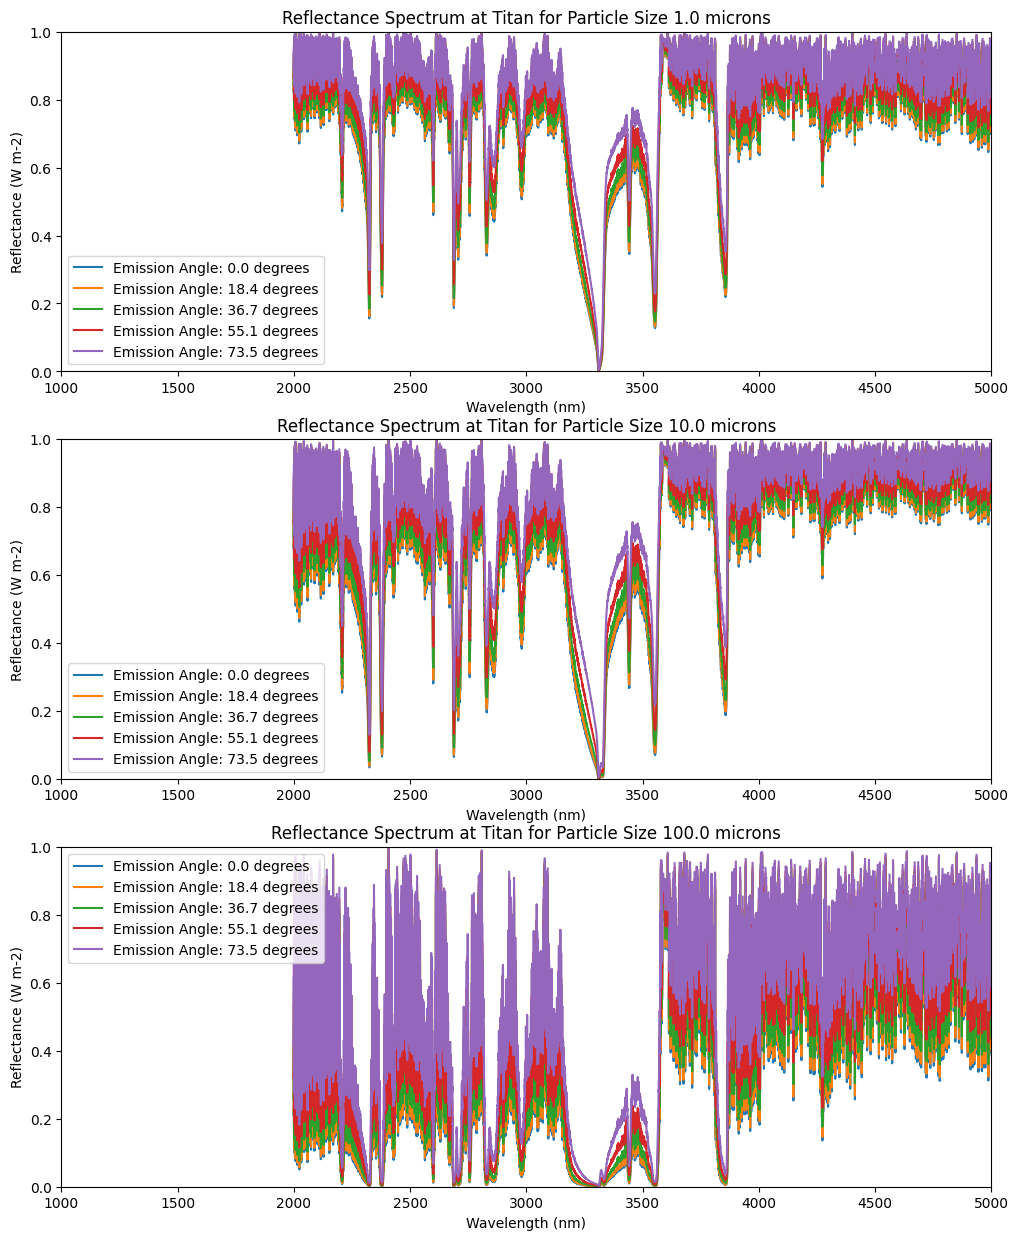

In [206]:
#plotting the albedos over the wavelength region
fig, axs = plt.subplots(3, 1, figsize=(12, 15))

for some_axis, radius in enumerate(radii):
    for j, some_albedo in enumerate(albedo):
        if j%10==0:
            axs[some_axis].plot(wavelengths, some_albedo[some_axis], label=f"Emission Angle: {round(np.rad2deg(theta_e[j]),1)} degrees")
        else:
            continue

    axs[some_axis].set_xlim([1000, 5000])
    axs[some_axis].set_ylim([0, 1])
    axs[some_axis].set_xlabel('Wavelength (nm)')
    axs[some_axis].set_ylabel("Reflectance (W m-2)")
    axs[some_axis].legend()
    axs[some_axis].set_title(f"Reflectance Spectrum at Titan for Particle Size {radius*1e6} microns")


I compared these results with Figures 9 and 11 from Maltagliati et al. 2015 paper on solar occultations of Titan's atmosphere. We can observe a similar absorption feature around 3.5 micron and a series of absorption lines bluer than this, although there are more absorption features in this synthetic spectrum than in the reflectance observations.

The 1 and 10 micron particle sizes appear to match the observations the best, although none of these match particular well to the observations. The ~3.5 micron feature is reasonably close, although the features close to 4micron is not apparent in the observations. The absorption feature just bluer of 2.5 micron is also seen in the observations, but there are several absorption features between these two major absorption bands which are not observed, but are present in the synthetic spectra.